In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/medium.csv")


In [ ]:
text = []
for i in df["text"]:
  text.append(str(i))


In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = text
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model


In [6]:
x_sub = []
y_sub = []
for i in range(4, 21):
  print("Iteration " + str(i))
  lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=i, workers=4, chunksize=20, passes=3, batch=True, alpha='symmetric',
                  eta=1, decay=0.8, offset=1.0, eval_every=1, iterations=5,
                  gamma_threshold=0.01, random_state=12)
  top5_ = lda.print_topics(num_topics=8, num_words=10)
  x_sub.append(i)
  c = 0
  for i in top5_:

    c += 1
    '''print("Topic "+str(c))
    print(i)'''
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')

  y_sub.append(coherence_model_lda.get_coherence())
  print(coherence_model_lda.get_coherence())


Iteration 4
0.3042431663201389
Iteration 5
0.3047346257474325
Iteration 6
0.3086223667115736
Iteration 7
0.31129224262876426
Iteration 8
0.3066536801771429
Iteration 9
0.3079167380747272
Iteration 10
0.3104534265920403
Iteration 11
0.30988960555969103
Iteration 12
0.3079076636458971
Iteration 13
0.3049529278739204
Iteration 14
0.3062503424915501
Iteration 15
0.3057034867349117
Iteration 16
0.3066121060885853
Iteration 17
0.30609267668850537
Iteration 18
0.307785374452881
Iteration 19
0.30752162825215923
Iteration 20
0.307491671745869


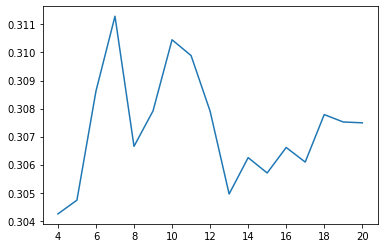

In [8]:
import matplotlib.pyplot as plt
plt.plot(x_sub, y_sub)
plt.show()

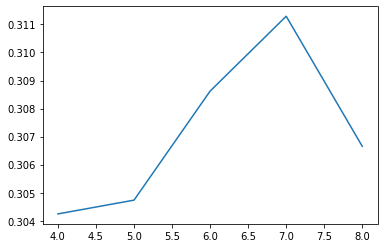

In [9]:
x = x_sub[:5]
y = y_sub[:5]
plt.plot(x, y)
plt.show()

In [10]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 6.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=f85c29b3b4e10c92777b50bc32c6313918344cdeecd04b0fdb97aaac25fb31e9
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [11]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15    -0.000624 -0.002968       1        1  5.146424
4     -0.000784  0.001633       2        1  5.108251
1      0.001587  0.000460       3        1  5.091153
0     -0.001846 -0.000709       4        1  5.090610
9     -0.000789 -0.001044       5        1  5.090513
17    -0.000589  0.000253       6        1  5.083926
6     -0.000075  0.000697       7        1  5.061197
18     0.000197  0.000344       8        1  5.039020
3     -0.001330  0.001472       9        1  5.021506
10     0.000176 -0.001694      10        1  5.003622
7     -0.000554  0.000308      11        1  4.996313
5     -0.002657 -0.001250      12        1  4.977803
16     0.000905 -0.000682      13        1  4.975132
14    -0.000064  0.001249      14        1  4.966941
13     0.001402 -0.000396      15        1  4.966341
8      0.000074  0.001076      16        1  4.960449
2     -0.000871  0.002119      17        1  4.897790
19     0.001691 -0.000537      18        1  4.857411
12     0.001816 -0.000960      19        1  4.832817
11     0.002337  0.000630      20        1  4.832781, topic_info=           Term          Freq         Total Category  logprob  loglift
404        data  92918.000000  92918.000000  Default  30.0000  30.0000
1265      learn  54414.000000  54414.000000  Default  29.0000  29.0000
86          use  67287.000000  67287.000000  Default  28.0000  28.0000
196          ai  57889.000000  57889.000000  Default  27.0000  27.0000
579         get  22196.000000  22196.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
610        help    908.074589  17786.452866  Topic20  -6.1165   0.0549
45     intellig    983.882833  23571.804277  Topic20  -6.0363  -0.1466
761       model   1068.882992  32234.926517  Topic20  -5.9534  -0.3767
80    technolog   1008.149632  27546.496447  Topic20  -6.0119  -0.2780
623       human    992.413994  27933.925223  Topic20  -6.0276  -0.3077

[1733 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2246      1  0.040113     0
2246      2  0.056919     0
2246      3  0.043314     0
2246      4  0.045815     0
2246      5  0.043615     0
...     ...       ...   ...
4285     16  0.035381  õpet
4285     17  0.045490  õpet
4285     18  0.045490  õpet
4285     19  0.045490  õpet
4285     20  0.055598  õpet

[18700 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 5, 2, 1, 10, 18, 7, 19, 4, 11, 8, 6, 17, 15, 14, 9, 3, 20, 13, 12])